# ALD_U_N_2C

> Abstract: Access to level 2c product

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

viresclient: 0.11.3
pandas     : 2.1.3
xarray     : 2023.12.0
matplotlib : 3.8.2



In [2]:
from viresclient import AeolusRequest
import datetime as dt
import matplotlib.pyplot as plt

request = AeolusRequest()

## Product information

Description of product.

Documentation:
- https://earth.esa.int/eogateway/catalog/aeolus-preliminary-hlos-horizontal-line-of-sight-wind-observations-for-rayleigh-and-mie-receivers


Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.459MB)

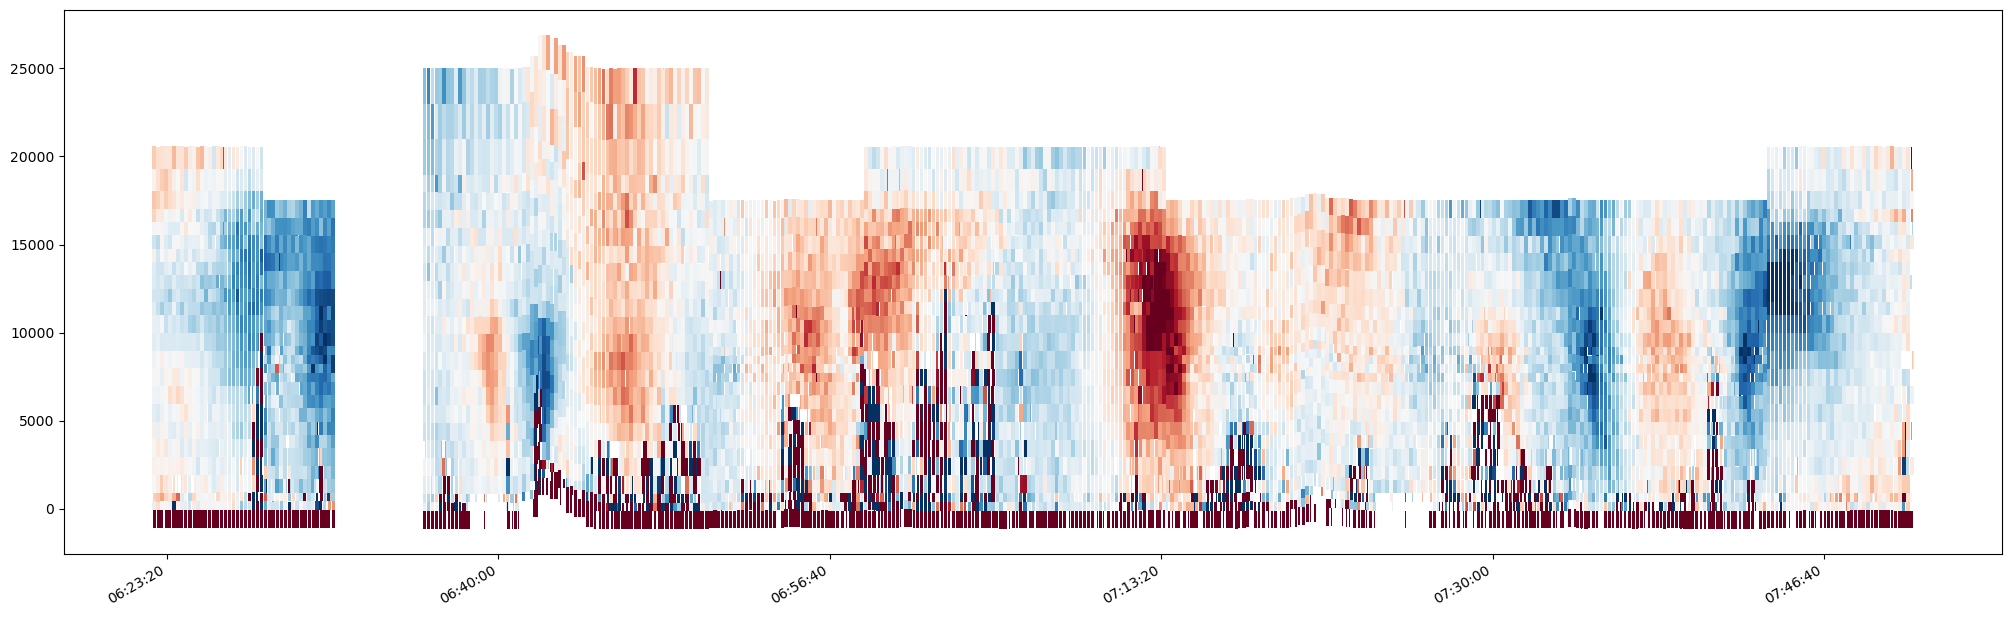

In [3]:

import matplotlib
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

plt.rcParams["figure.figsize"] = (25,8)

request.set_collection('ALD_U_N_2C')

request.set_fields(rayleigh_wind_fields=[
    "rayleigh_wind_result_start_time",
    "rayleigh_wind_result_stop_time",
    "rayleigh_wind_result_bottom_altitude",
    "rayleigh_wind_result_top_altitude",
    "rayleigh_wind_result_wind_velocity",
])

data = request.get_between(
    start_time="2020-04-15T06:21:58Z",
    end_time="2020-04-15T07:50:33Z",
    filetype="nc",
    asynchronous=False
)

ds = data.as_xarray()

X0 = ds['rayleigh_wind_result_start_time'].values
X1 = ds['rayleigh_wind_result_stop_time'].values

Y0 = ds['rayleigh_wind_result_bottom_altitude'].values
Y1 = ds['rayleigh_wind_result_top_altitude'].values
Z = ds['rayleigh_wind_result_wind_velocity'].values

patches = []
for x0, x1, y0, y1 in zip(X0, X1, Y0, Y1):
    patches.append((
        (x0, y0), (x0, y1), (x1, y1), (x1, y0)
    ))

fig, ax = plt.subplots()
coll = PolyCollection(
    patches, array=Z, cmap=matplotlib.cm.RdBu_r,
    norm=matplotlib.colors.Normalize(vmin=-6000, vmax=6000, clip=False),
)
ax.add_collection(coll)

epoch2000 = datetime(2000, 1, 1)
def format_date(x, pos=None):
    dt_obj = datetime.fromtimestamp(int(x)+datetime.timestamp(epoch2000))
    return dt_obj.strftime('%H:%M:%S')

ax.xaxis.set_major_formatter(format_date)
ax.autoscale()
fig.autofmt_xdate()
plt.show()